# Análisis Exploratorio de Datos (EDA) – Sistema de recomendación de música

El objetivo de EDA es “comprender” los datos de la siguiente manera:

1. Confirme si los datos tienen sentido en el contexto del problema empresarial.
2. Obtenga información sobre el resumen de datos.
- Atributos y tipos de datos.
3. Comprender patrones y correlaciones entre variables de datos.
4. Descubra y resuelva problemas de calidad de datos.
- Datos faltantes (campos vacíos, nan).
- Datos anómalos (outliers).
- Datos repetidos (atributos repetidos, observaciones repetidas).
- Problemas de escala en los valores (ej.: algunos atributos con valores muy grandes y otros con valores muy pequeños).
- Problemas con los tipos de datos (asignación incorrecta de números enteros, flotantes, cadenas de caracteres, fechas, horas, ubicaciones geográficas, etc...).
5. Elimina las columnas no deseadas y deriva nuevas variables.

Hay cuatro tipos de EDA, son los siguientes:

- Univariado No Gráfico: Este es también el tipo más simple de EDA entre las otras opciones. El análisis no gráfico univariado consta de una sola variable. El objetivo principal de este tipo de EDA es describir los datos y encontrar patrones dentro de ellos.
- Gráfico univariado: a diferencia del tipo anterior de EDA, como su nombre indica, este método proporciona una visualización gráfica de los datos. Implica diferentes tipos de métodos de análisis, incluidos histogramas, diagramas de caja y diagramas de tallo y hojas.
- Multivariado No Gráfico: El tipo de EDA multivariado no gráfico consta de múltiples variables y establece relaciones entre variables usando tabulación cruzada o estadística.
- Gráfico multivariado: en este tipo de EDA, los gráficos muestran la relación entre dos o más conjuntos de datos. Los gráficos de barras y los diagramas de dispersión son los gráficos más utilizados en esta categoría. 

# Datos

### Contexto

Estos conjuntos de datos son originalmente de Spotify. El objetivo de los conjuntos de datos es recomendar una canción a un usuario de una aplicación, en función de varias características de la canción, especialmente, el año y el género y el artista de la canción.

https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/data

### Contenido

Los 4 datasets consisten en varias variables de canciones, de genéros, y de artistas y de años cuando salieron canciones. Se tiene además una variable 'target', que es `popularity`.

### Atributos de la música
El conjunto de datos recopilado en el primer artículo de esta serie contiene los atributos de la canción. Antes de realizar el análisis de datos, es necesario comprender esas características individualmente.

Los atributos de la canción en el conjunto de datos se explican a continuación:

+ `tempo`: El tempo de la canción. El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo.

+ `energy`: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Cuanto mayor sea el valor, más enérgica será la canción.

+ `danceability`: la bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. El valor varía de 0 a 1. Cuanto mayor sea el valor, más adecuada es la canción para bailar.

+ `loudness`: los valores de sonoridad se promedian en toda la pista. Es la calidad de una canción. Va desde -60 a 0 DB. Cuanto mayor sea el valor, más fuerte será la canción.

+ `valence`: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enfadadas).

+ `liveness`: Detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se interprete en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.

+ `acousticness`: una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.

+ `speechiness`: Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a la voz sea la grabación (p. ej., programa de entrevistas, audiolibro, poesía), más cercano a 1,0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén formadas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no sean de voz.

+ `mode`: Las canciones se pueden clasificar en mayores y menores. 1.0 representa el modo mayor y 0 representa el menor.

+ `key`: Clave es el tono, las notas o la escala de la canción que forma la base de una canción. 12 teclas van del 0 al 11.

https://medium.com/analytics-vidhya/spotify-music-data-analysis-part-3-9097829df16e#:~:text=Mode%3A%20Songs%20can%20be%20classified,the%20basis%20of%20a%20song

### Preguntas de interés

+ ¿De qué manera se puede recomendar una canción a un usuario, con base al género de la canción?
+ ¿Qué algoritmo de segmentación es el más adecuado para un sistema de recomendación de música?
+ ¿Se puede recomendar una canción a un usuario, con base a la popularidad de la canción, del género y del artista?

# Importación de librerías

Comenzaremos importando las bibliotecas que necesitaremos para realizar EDA. Estos incluyen NumPy, Pandas, Matplotlib y Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

%matplotlib inline

### Lectura de datos

In [2]:
#uploaded = files.upload()

In [3]:
#Cargar los archivos a google colab primero

data = pd.read_csv("data.csv")
genre_data = pd.read_csv("data_by_genres.csv")
year_data = pd.read_csv("data_by_year.csv")
artist_data = pd.read_csv("data_by_artist.csv")

# EDA

In [4]:
#La columna artistas es una lista, aquí se hace la transformación de una serie de str a una serie de list.
#Ejecutar sólo una vez por carga de archivos

data['artists'].astype('string')
artists = list()

for artist in data['artists']:
  artist_list = list()
  for a in artist.strip()[1:-1].strip().split(','):
    artist_list.append(a.strip()[1:-1].strip())
  artists.append(artist_list)

data['artists'] = artists

## Información general de 'data.csv'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

## Estadisticas de 'data.csv'

In [6]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


## Visualización de algunos datos de 'data.csv'

In [7]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [8]:
data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"[Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Bal...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,[Ashnikko],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,[MAMAMOO],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,[Eminem],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"[KEVVO, J Balvin]",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


## Manejo de outliers de 'data.csv'

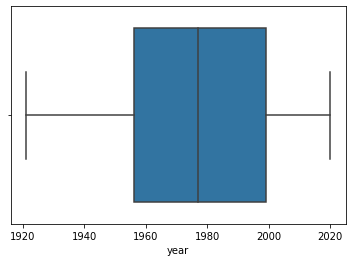

In [9]:
sns.boxplot(x=data["year"])

En este gráfico podemos evidenciar que no existen datos fuera de rango en los años de lanzamiento de cada canción.

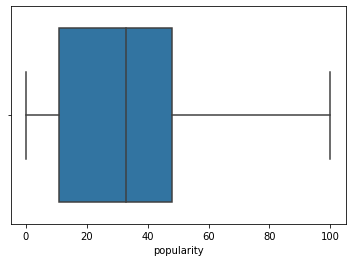

In [10]:
sns.boxplot(x=data["popularity"])

En este gráfico podemos evidenciar que no existen datos fuera de rango en la popularidad de las canciones.

## Información general de 'data_by_genres.csv'

In [11]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


## Estadisticas de 'data_by_genres.csv'

In [12]:
genre_data.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


## Visualización de algunos datos de 'data_by_genres.csv'

In [13]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [14]:
genre_data.tail()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2968,1,zolo,0.222625,0.547082,258099.064530,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,206320.000000,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,306072.777778,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,198417.333333,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7
2972,1,zydeco,0.421038,0.629409,171671.690476,0.609369,0.019248,0.255877,-9.854825,0.050491,126.366087,0.808544,30.261905,7


## Información general de 'data_by_year.csv'

In [15]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


## Estadisticas de 'data_by_year.csv'

In [16]:
year_data.describe()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


## Visualización de algunos datos de 'data_by_year.csv'

In [17]:
year_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [18]:
year_data.tail()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1
99,1,2020,0.219931,0.692904,193728.397537,0.631232,0.016376,0.178535,-6.595067,0.141384,124.283129,0.501048,64.301970,1


## Información general de 'data_by_artist.csv'

In [19]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


## Estadisticas de 'data_by_artist.csv'

In [20]:
artist_data.describe()

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


## Visualización de algunos datos de 'data_by_artist.csv'

In [21]:
artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [22]:
artist_data.tail()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.3060,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.0,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.3340,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.0,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.1484,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.0,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.6860,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.0,11
28679,1,2,0.568000,조정현,0.447000,237688.000000,0.2150,0.000001,0.064900,-16.478000,0.027200,71.979000,0.177000,31.0,10


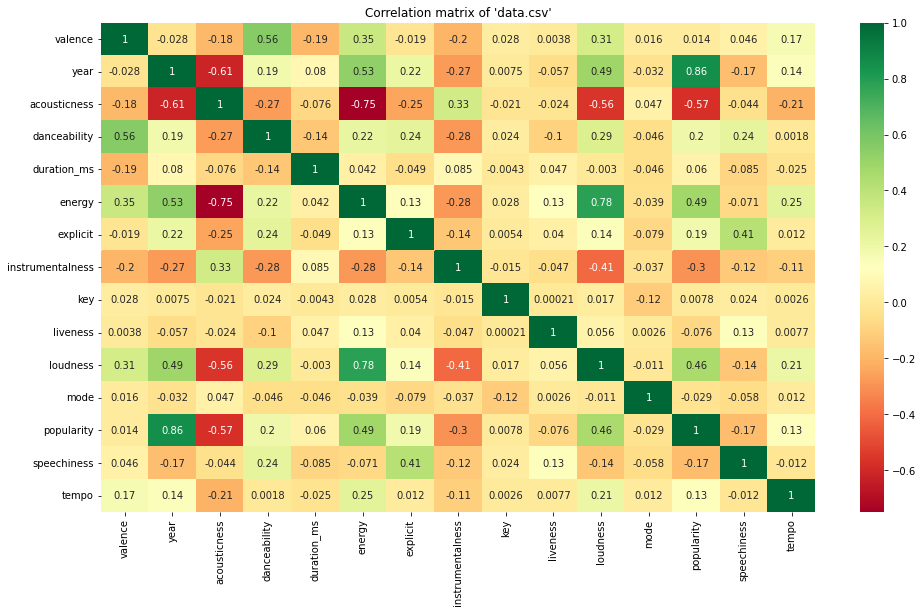

In [23]:
plt.figure(figsize = (16,9))
plot = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn').set(title="Correlation matrix of 'data.csv'")

Existe una correlación directamente proporcional entre la popularidad y el año de las canciones
Existe una correlación inversamente proporcional entre la popularidad y la acústica de las canciones


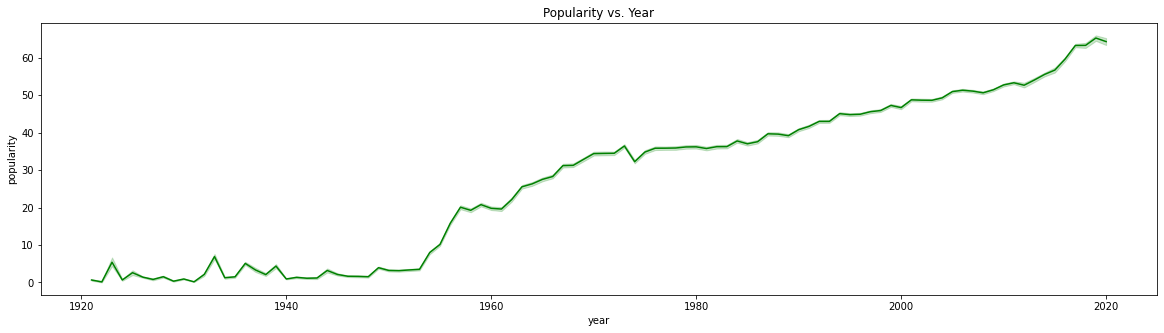

In [24]:
plt.figure(figsize = (20,5))
plot = sns.lineplot(x='year', y='popularity', data=data, color='green').set(title='Popularity vs. Year')

Hay un incremento desde 1921 en la popularidad de las canciones hasta 2020 

In [25]:
data_pie = data['explicit'].value_counts()

px.pie(data_pie, values='explicit', names=['not explicit' , 'explicit'], title='Explicit songs percent')

Hay un 91.5% de ejemplos no  explícitos en cada clase y 8.5% de ejemplos explícitos en el conjunto de datos

In [26]:
data_pie = data['mode'].value_counts()

px.pie(data_pie, values='mode', names=['major mode' , 'minor mode'], title='Songs mode distribution')

Se utiliza el modo en un 70.7% en las canciones y no se utiliza el modo en un 29.3% de las canciones.

In [37]:
data_pie = data['key'].value_counts()

print(data_pie)

px.pie(data_pie, values='key', names=['key 1', 'key 8', 'key 3', 'key 10', 'key 6', 'key 5', 'key 2', 'key 11', 'key 9', 'key 12', 'key 7', 'key 4'], title='Songs key distribution')

0     21600
7     20803
2     18823
9     17571
5     16430
4     12933
1     12886
10    12148
8     10751
11    10670
6      8741
3      7297
Name: key, dtype: int64


La nota predominante en las canciones es la key 1 con un 12.7% 

Las nota menos usada en las canciones es la key 4 con un 4.28%


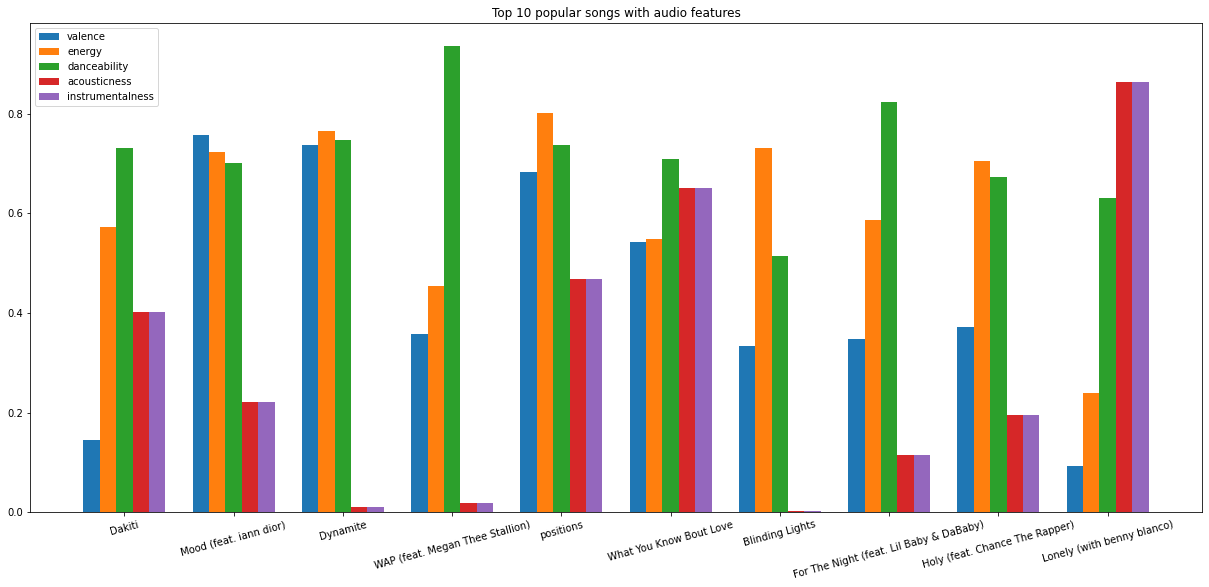

In [28]:
plt.figure(figsize = (21,9))
rank = data.nlargest(10, 'popularity')
n = len(rank.index)
x = np.arange(n)
width = 0.15
plt.bar(x - width * 2, rank.valence, width=width, label='valence')
plt.bar(x - width, rank.energy, width=width, label='energy')
plt.bar(x, rank.danceability, width=width, label='danceability')
plt.bar(x + width, rank.acousticness, width=width, label='acousticness')
plt.bar(x + width * 2, rank.acousticness, width=width, label='instrumentalness')
plt.xticks(x, rank.name,  rotation=15)
plt.legend()
plt.title("Top 10 popular songs with audio features")
plt.show()

Podemos observar que entre las 10 canciones más populares la acústica y la instrumentalidad siempre son las mismas

La valencia, la energía y la bailabilidad varía entre las 10 canciones más populares


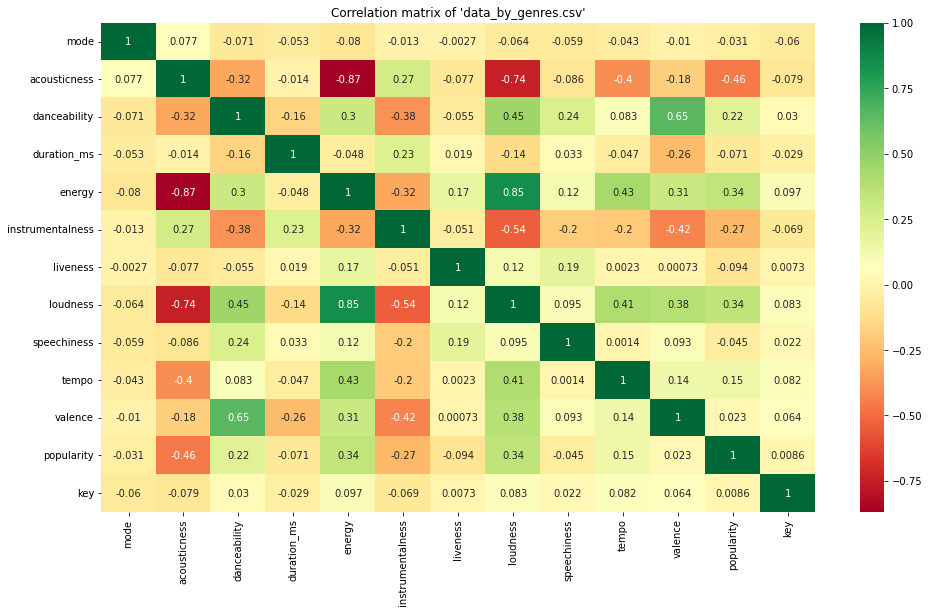

In [29]:
plt.figure(figsize = (16,9))
plot = sns.heatmap(genre_data.corr(), annot=True, cmap='RdYlGn').set(title = "Correlation matrix of 'data_by_genres.csv'")

Existe una correlación directamente proporcional entre el volumen y la energía del género de las canciones


Existe una correlación inversamente proporcional entre la energía y la acústica del género de las canciones


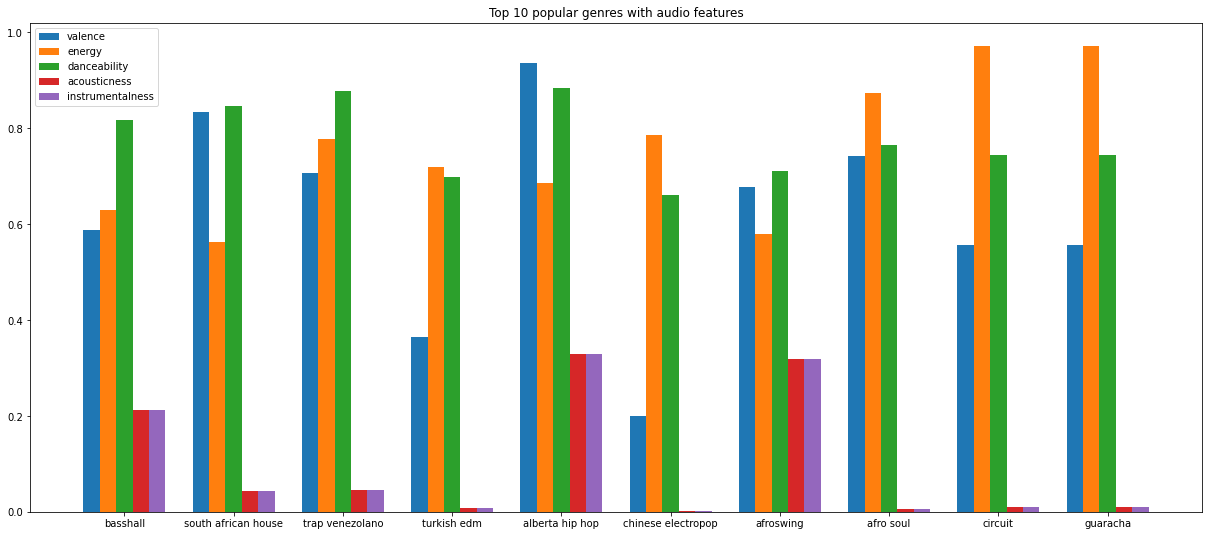

In [30]:
plt.figure(figsize = (21,9))
rank_genres = genre_data.nlargest(10, 'popularity')
n = len(rank_genres.index)
x = np.arange(n)
width = 0.15
plt.bar(x - width * 2, rank_genres.valence, width=width, label='valence')
plt.bar(x - width, rank_genres.energy, width=width, label='energy')
plt.bar(x, rank_genres.danceability, width=width, label='danceability')
plt.bar(x + width, rank_genres.acousticness, width=width, label='acousticness')
plt.bar(x + width * 2, rank_genres.acousticness, width=width, label='instrumentalness')
plt.xticks(x, rank_genres.genres)
plt.legend()
plt.title("Top 10 popular genres with audio features")
plt.show()

La variable que menos influyó en el éxito de los 10 géneros más escuchados fue la acústica

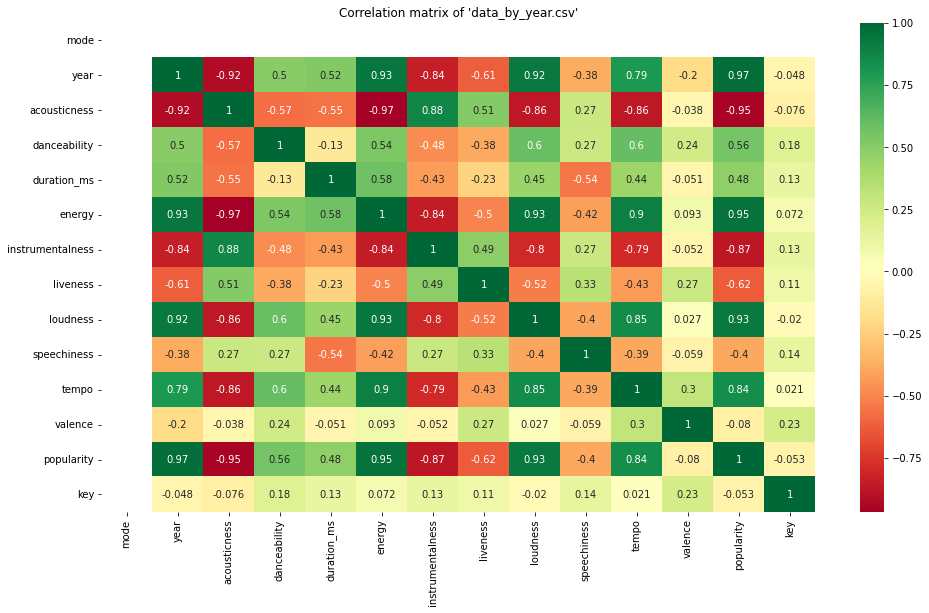

In [31]:
plt.figure(figsize = (16,9))
plot = sns.heatmap(year_data.corr(), annot=True, cmap='RdYlGn').set(title = "Correlation matrix of 'data_by_year.csv'")

Existe una correlación directamente proporcional entre la energía-volumen-popularidad y el año, y entre el volumen-tempo-popularidad y la energía de las canciones en cuanto al tiempo(años)

Existe una correlación inversamente proporcional entre la acústica y año, y entre la energía-tempo-popularidad y la acústica de las canciones en cuanto al tiempo (años)


In [32]:
def get_decade(year):
    return int(year/10) * 10

data['decade'] = data['year'].apply(get_decade)

px.histogram(data['decade'], x="decade", color="decade", title='Songs number by decade')

Las épocas donde se escuchó un mayor número de canciones fueron en 1950, 1970 y 1990.

La época donde se escuchó un menor número de canciones fue en 2020.


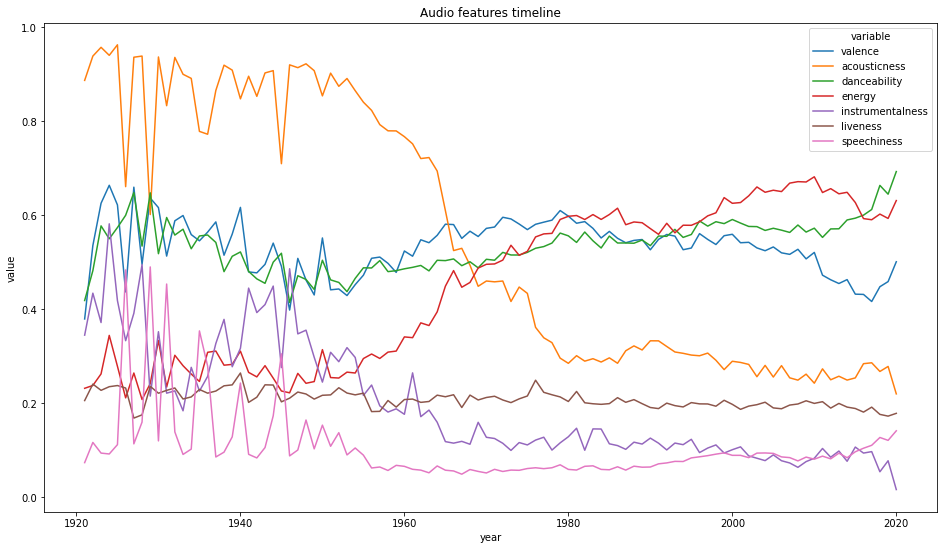

In [33]:
plt.figure(figsize = (16,9))
plot = sns.lineplot(x='year', y='value', hue='variable', 
             data=pd.melt(year_data[['valence', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'year', 'speechiness']], ['year'])
             ).set(title = "Audio features timeline")

En el año 1970 la acústica y la instrumentalidad tuvieron una caída de importancia

En el mismo año la energía tuvo una alza de importancia

La vivacidad se mantuvo constante durante 1920-2020


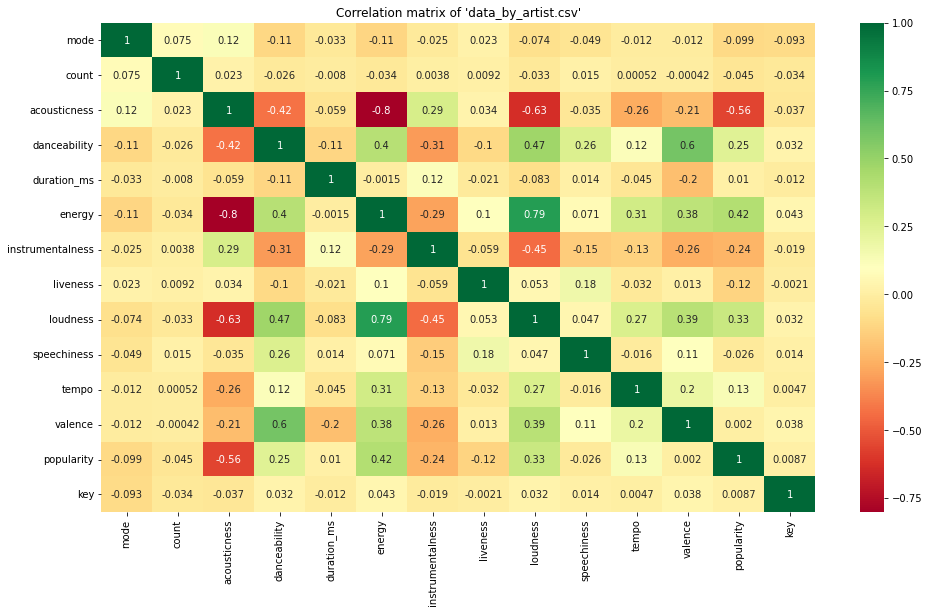

In [34]:
plt.figure(figsize = (16,9))
plot = sns.heatmap(artist_data.corr(), annot=True, cmap='RdYlGn').set(title = "Correlation matrix of 'data_by_artist.csv'")

Existe una correlación directamente proporcional entre el volumen y la energía de las canciones del artista

Existe una correlación inversamente proporcional entre la energía y la acústica de las canciones del artista


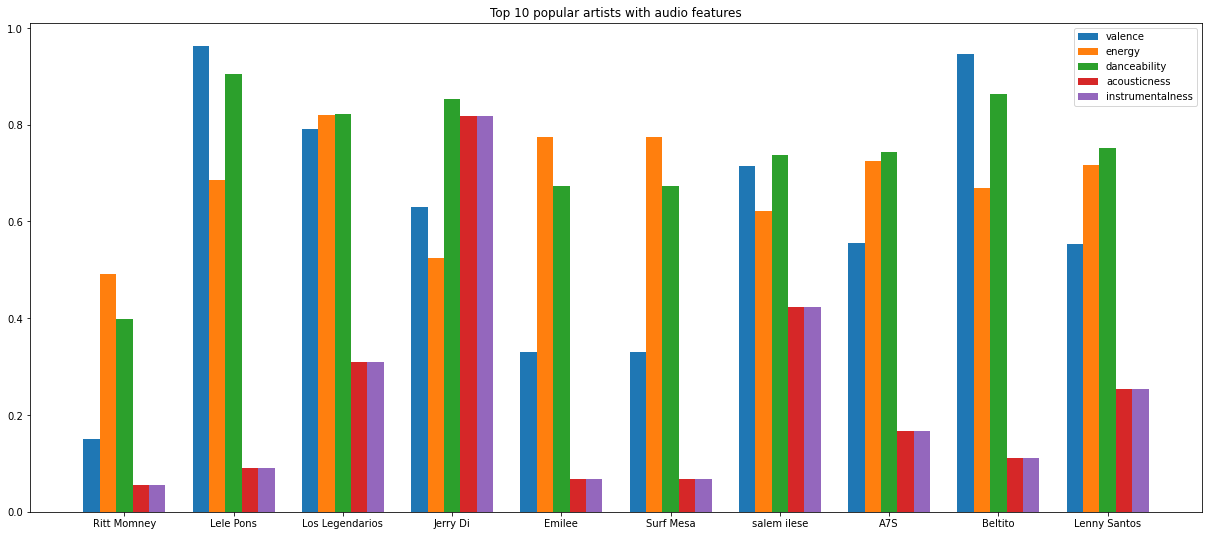

In [35]:
plt.figure(figsize = (21,9))
rank_artist = artist_data.nlargest(10, 'popularity')
n = len(rank_artist.index)
x = np.arange(n)
width = 0.15
plt.bar(x - width * 2, rank_artist.valence, width=width, label='valence')
plt.bar(x - width, rank_artist.energy, width=width, label='energy')
plt.bar(x, rank_artist.danceability, width=width, label='danceability')
plt.bar(x + width, rank_artist.acousticness, width=width, label='acousticness')
plt.bar(x + width * 2, rank_artist.acousticness, width=width, label='instrumentalness')
plt.xticks(x, rank_artist.artists)
plt.legend()
plt.title("Top 10 popular artists with audio features")
plt.show()

Las variables que menos influyeron en el éxito de los 10 artistas más escuchados fueron la acústica y la instrumentalidad de sus canciones.

Para Lele Pons y Beltito la variable que más influyó en el éxito de sus canciones fue la valencia

Para Emilee y Surf Mesa la variable que más influyó en el éxito de sus canciones fue la energía
  
Para Jerry Di, Salem Ilese y A75 la variable que más influyó en el éxito de sus canciones fue la bailabilidad 
